# Flights Data Exploration Challenge

In this challge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [45]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        




# Our code to explore the data

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [48]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [49]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [50]:
df_flights.DepDel15=df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Handle Outliers


DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



<ipython-input-51-b2b827c4d46e>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-51-b2b827c4d46e>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


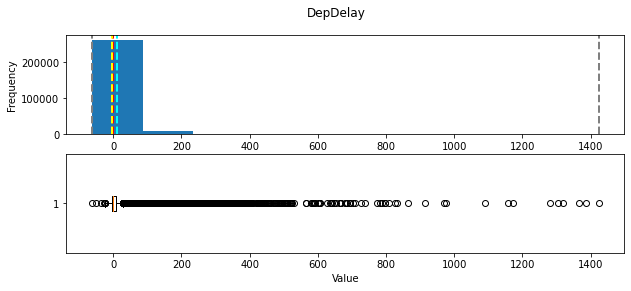

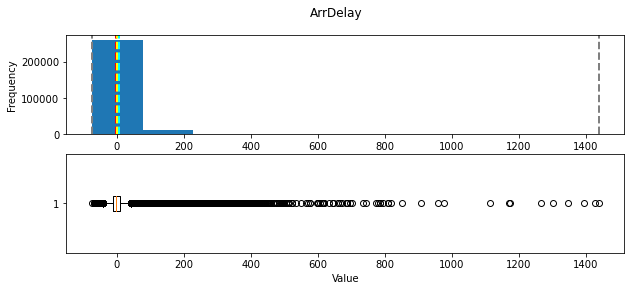

In [51]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

In [64]:
## Handling outliers of DepDelay
DepDelay_90pcntile=df_flights['DepDelay'].quantile(0.90)
DepDelay_01pcntile=df_flights['DepDelay'].quantile(0.01)
DepDelay_01pcntile, DepDelay_90pcntile

(-12.0, 37.0)

In [63]:
# df_flights[(df_flights['DepDelay']>min_threshold) & (df_flights['DepDelay']<max_threshold)]----problem

In [70]:
# Trim outliers for DepDelay based on 1% and 90% percentiles

df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

In [71]:
## Handling outliers of ArrDelay
ArrDelay_90pcntile=df_flights['ArrDelay'].quantile(0.90)
ArrDelay_01pcntile=df_flights['ArrDelay'].quantile(0.01)
ArrDelay_01pcntile,ArrDelay_90pcntile

(-29.0, 8.0)

In [67]:
# df_flights[(df_flights['ArrDelay']>ArrDelay_01pcntile) & (df_flights['ArrDelay']<ArrDelay_90pcntile)]----problem

In [74]:
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]


DepDelay 
Minimum:-11.00
Mean:-1.15
Median:-2.00
Mode:-3.00
Maximum:36.00

ArrDelay 
Minimum:-28.00
Mean:-7.58
Median:-7.00
Mode:0.00
Maximum:7.00



<ipython-input-51-b2b827c4d46e>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-51-b2b827c4d46e>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


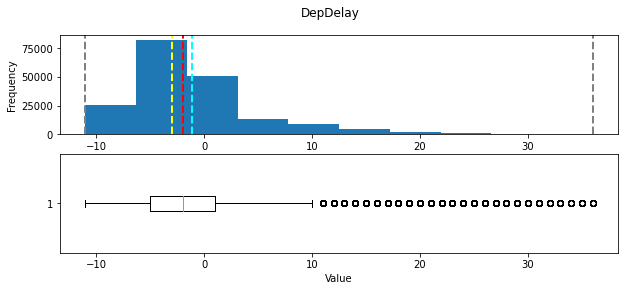

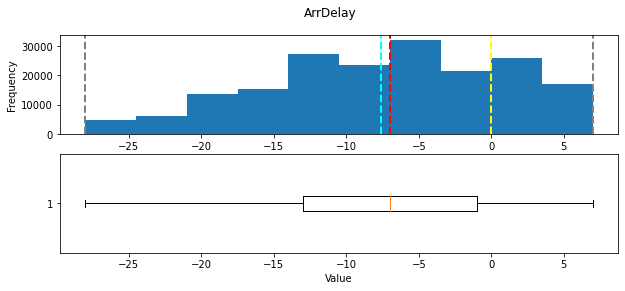

In [75]:
# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

## Explore the Data

In [76]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,187597.0,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000,187597.000000
mean,2013.0,7.031376,15.798232,3.905953,12758.150269,12730.977963,1273.310362,-1.152316,0.027490,1453.917819,-7.579167,0.015213,0.015213
std,0.0,2.011186,8.867750,2.002187,1515.410276,1507.275551,471.029679,5.984150,0.163506,487.290106,8.224680,0.122401,0.122401
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-28.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,845.000000,-5.000000,0.000000,1049.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1230.000000,-2.000000,0.000000,1435.000000,-7.000000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1650.000000,1.000000,0.000000,1842.000000,-1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,7.000000,1.000000,1.000000


# #What are the mean departure and arrival delays?

In [77]:
df_flights[['DepDelay','ArrDelay']].mean()

DepDelay   -1.152316
ArrDelay   -7.579167
dtype: float64

# How do the carriers compare in terms of arrival delay performance?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='Carrier'>

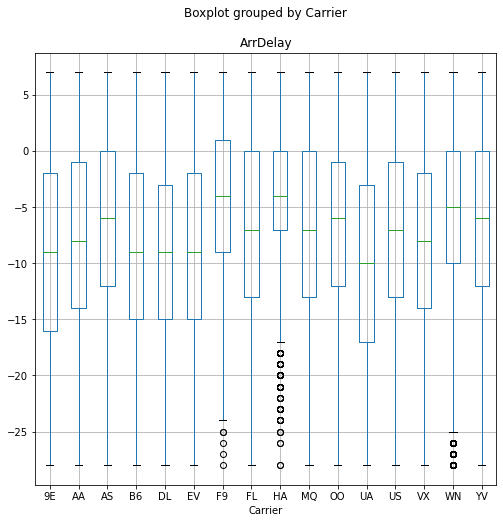

In [79]:
df_flights.boxplot(column='ArrDelay', by='Carrier',figsize=(8,8))

# Are some days of the week more prone to arrival days than others?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

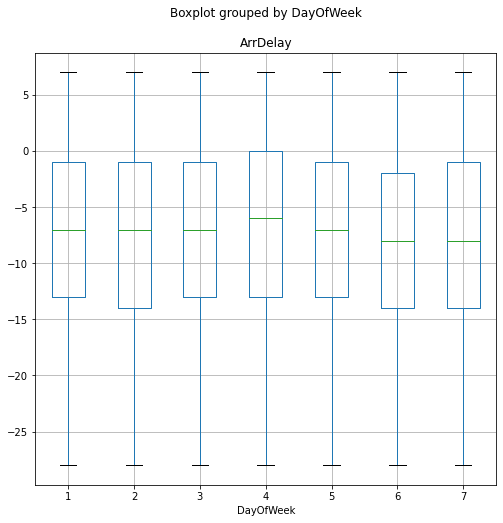

In [80]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek',figsize=(8,8))

# Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.120189
Dallas Love Field,1.172830
William P Hobby,0.873893
Baltimore/Washington International Thurgood Marshall,0.411591
Denver International,0.356818
...,...
Ted Stevens Anchorage International,-3.325885
Richmond International,-3.430288
Tucson International,-3.547929


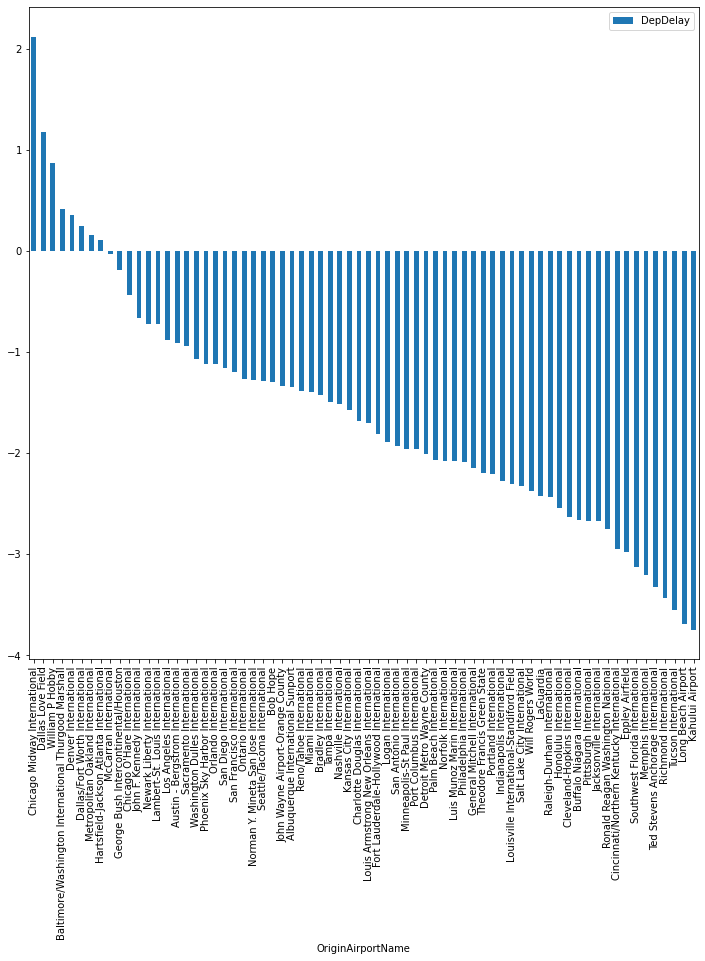

In [82]:
departure_group_airport=df_flights.groupby(df_flights.OriginAirportName)
mean_departure_delays=pd.DataFrame(departure_group_airport['DepDelay'].mean()).sort_values('DepDelay',ascending=False)
mean_departure_delays.plot(kind='bar', figsize=(12,12))
mean_departure_delays


# Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

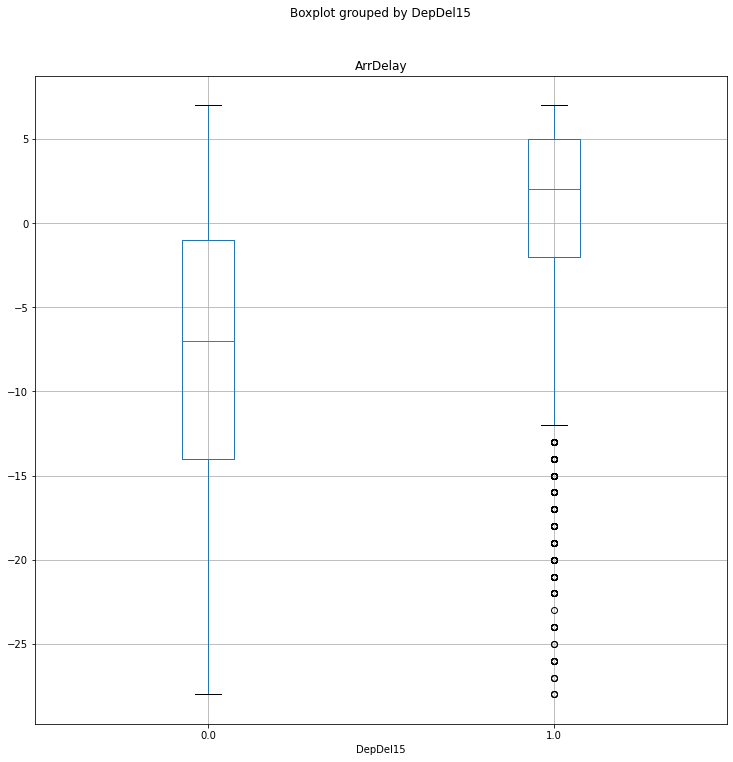

In [84]:
df_flights.boxplot(column='ArrDelay',by='DepDel15', figsize=(12,12))

# Which route (from origin airport to destination airport) has the most late arrivals?

In [88]:
# Add a routes column
routes=pd.Series(df_flights['OriginAirportName'] + '>' + df_flights['DestAirportName'])
df_flights=pd.concat([df_flights,routes.rename("Route")],axis=1)

# Group by routes
route_group=df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15',ascending=False)

,ArrDel15
Route,
San Francisco International>Los Angeles International,44
Los Angeles International>San Francisco International,33
LaGuardia>Chicago O'Hare International,23
LaGuardia>Logan International,22
Detroit Metro Wayne County>Chicago O'Hare International,20
...,...
Lambert-St. Louis International>San Antonio International,0
Lambert-St. Louis International>Salt Lake City International,0
Lambert-St. Louis International>Raleigh-Durham International,0


# Which route has the highest average arrival delay?

In [89]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay',ascending=False)

,ArrDelay
Route,
Port Columbus International>Logan International,7.000000
Indianapolis International>Philadelphia International,4.000000
Metropolitan Oakland International>Logan International,4.000000
Cincinnati/Northern Kentucky International>Phoenix Sky Harbor International,2.000000
Jacksonville International>Minneapolis-St Paul International,1.500000
...,...
Lambert-St. Louis International>Cleveland-Hopkins International,-20.000000
Jacksonville International>Chicago Midway International,-20.600000
Newark Liberty International>Will Rogers World,-22.500000
